# NLP demo 1

In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth',100)

In [9]:
data = pd.read_csv('data/Subscription Cancellation _ Raw data for Sentiment Analysis.csv')

In [5]:
data.head()

,id,customer_id,first_name,last_name,name,email,phone_number,log_type,product_names,product_ids,subscription_id,subscription_term,subscription_start_date,cancel_reason,note,log_time,ship_to,ship_street,ship_unit,ship_city,ship_state,ship_zip_code,ship_country,location,country,months_subscribed
0,2089666222,556139403,Kevin,Ramsdell,Kevin Ramsdell,ramsdellr@aol.com,NaN,cancelled,Soapscription - 3 Bars per Month,270509487,556139503,Month to Month,2016-11-26T09:13:08Z,other_service_issue,Send the correct products that I ordered. It t...,2019-03-24T07:58:19Z,Kevin Ramsdell,577 Back Rd,NaN,Shapleigh,ME,04076,US,"ME, US",US,28
1,2089652438,1749951663,Ksenia,Harper,Ksenia Harper,ksenia.harper@gmail.com,NaN,cancelled,"Soapscription - 6 Bars per Quarter, Soapscript...","270519234, 270519234, 270519234",1749951763,1 Quarter,2018-09-13T07:40:33Z,resubscribe_later,Nothing personal :),2019-03-24T07:45:51Z,Ksenia Harper,321 Babbling Brook Cir,NaN,Rincon,GA,31326,US,"GA, US",US,6
2,2089630805,2047303932,Timothy,Mckirch,Timothy Mckirch,mckirchtim@gmail.com,NaN,cancelled,Soapscription - 2 Bars per Month,270508959,2047304113,Month to Month,2019-03-01T07:23:43Z,not_worth_price,X,2019-03-24T07:24:45Z,TIMOTHY MCKIRCH,6961 ROUTE E,NaN,PINEVILLE,MO,64856,US,"MO, US",US,0
3,2089606272,1984807015,Jason,Vance,Jason Vance,bud_se_15@yahoo.com,NaN,cancelled,"Soapscription - 2 Bars per Month, Soapscriptio...","270508959, 270508959, 270508959",1984807089,Month to Month,2019-01-25T19:22:36Z,resubscribe_later,Just too much soap right now,2019-03-24T06:57:13Z,Jason Vance,2141 Bloomfield Ave,NaN,Roanoke,VA,24012,US,"VA, US",US,2
4,2089602739,1086500949,Tyler,Cassel,Tyler Cassel,tcassel18@gmail.com,NaN,cancelled,"Soapscription - 1 Bar per Month, Soapscription...","270508075, 270508075, 270508075, 270508075, 27...",1222627746,Month to Month,2017-12-31T22:50:26Z,resubscribe_later,Nothing,2019-03-24T06:52:53Z,Tyler Cassel,4973 Lincolnwood Drive,NaN,York,PA,17408,US,"PA, US",US,15


In [29]:
data.log_type.unique()

array(['cancelled', 'expired'], dtype=object)

In [10]:
data.shape

(34797, 26)

In [11]:
data.columns

Index(['id', 'customer_id', 'first_name', 'last_name', 'name', 'email',
       'phone_number', 'log_type', 'product_names', 'product_ids',
       'subscription_id', 'subscription_term', 'subscription_start_date',
       'cancel_reason', 'note', 'log_time', 'ship_to', 'ship_street',
       'ship_unit', 'ship_city', 'ship_state', 'ship_zip_code', 'ship_country',
       'location', 'country', 'months_subscribed'],
      dtype='object')

In [35]:
data1 = data[data.note.notnull()]

In [36]:
data1.shape

(24212, 26)

In [37]:
notes = data1.note.values

In [38]:
notes.shape

(24212,)

In [39]:
notes[0]

'Send the correct products that I ordered. It took me 4 months to get a vial of beard oil I ordered, just to be jerked around the entire time until it finally arrived. Not one person I talked with offered anything to make it right. Terrible customer service.'

 ## NLP representation of the documents

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lipengyuan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
# Create TfidfVectorizer, and name it vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = stopwords.words('english'), max_features=2000)

# Train the model with data
vectors_train = tfidf_vectorizer.fit_transform(notes).toarray()

# Get the vocab of tfidf
wordspitts = tfidf_vectorizer.get_feature_names()


In [41]:
wordspitts

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1st',
 '20',
 '200',
 '2017',
 '2019',
 '20th',
 '21',
 '22',
 '25',
 '28th',
 '2nd',
 '2x',
 '30',
 '30th',
 '33',
 '36',
 '3rd',
 '40',
 '42',
 '4th',
 '50',
 '54',
 '5oz',
 '60',
 '75',
 '99',
 'aaa',
 'ability',
 'able',
 'abrasive',
 'abroad',
 'absolutely',
 'abundance',
 'acceptable',
 'access',
 'accident',
 'accidentally',
 'account',
 'accounts',
 'acct',
 'accumulated',
 'acne',
 'acquired',
 'across',
 'active',
 'actual',
 'actually',
 'ad',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'additionally',
 'address',
 'addresses',
 'adds',
 'adjust',
 'adjusting',
 'adjustments',
 'ads',
 'advance',
 'advantage',
 'advertised',
 'advertisement',
 'advertising',
 'afford',
 'affordable',
 'afraid',
 'afterwards',
 'ago',
 'agree',
 'ahead',
 'air',
 'alert',
 'alerts',
 'allergic',
 'allergies',
 'allergy',
 'allow',
 'allowed',
 'allowing',
 'allows',
 'almost',
 'aloe',
 'alone

## Sentiment Analysis on single comment

In [42]:
!pip install vaderSentiment

    100% |████████████████████████████████| 133kB 2.7MB/s 


In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [2]:
# this fucntion is for sentisement analysis on single comment
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

### Try on first note

In [52]:
sentiment_analyzer_scores("Send the correct products that I ordered. It took me 4 months to get a vial of beard oil I ordered, just to be jerked around the entire time until it finally arrived. Not one person I talked with offered anything to make it right. Terrible customer service.")

Send the correct products that I ordered. It took me 4 months to get a vial of beard oil I ordered, just to be jerked around the entire time until it finally arrived. Not one person I talked with offered anything to make it right. Terrible customer service. {'neg': 0.107, 'neu': 0.893, 'pos': 0.0, 'compound': -0.5994}


In [9]:
a = analyser.polarity_scores("I don't like it")
b = analyser.polarity_scores("I LIKE it ")
c = analyser.polarity_scores('X')

In [66]:
a

{'neg': 0.513, 'neu': 0.487, 'pos': 0.0, 'compound': -0.2755}

In [67]:
b

{'neg': 0.0, 'neu': 0.236, 'pos': 0.764, 'compound': 0.4995}

In [10]:
c

{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}

## Sentiment Analysis on all comments

In [71]:
pdnote = pd.DataFrame(data1.note)

In [72]:
pdnote.shape

(24212, 1)

In [73]:
pdnote.head()

,note
0,Send the correct products that I ordered. It took me 4 months to get a vial of beard oil I order...
1,Nothing personal :)
2,X
3,Just too much soap right now
4,Nothing


In [111]:
def sentiment(note):
    b = []
    a = analyser.polarity_scores(note)
    if a['neg'] > 0.500 or (a['neg']>a['pos'] and a['neg']>a['neu']) or a['compound']<0 :
        b.append('NEG')
    
    if a['pos'] >0.500  or (a['pos']>a['neg'] and a['pos']>a['neu']) or a['compound']>0:
        b.append('POS')
    elif a['neu'] > 0.500:
        b.append('NEU')
    
    if len(b)>1 and 'NEU' in b:
        b.remove('NEU')
    if len(b)==0:
        b.append('UnKnown')
    return b[0]

In [112]:
# test the function
# sentiment("Send the correct products that I ordered. It took me 4 months to get a vial of beard oil I ordered, just to be jerked around the entire time until it finally arrived. Not one person I talked with offered anything to make it right. Terrible customer service. ")
# analyser.polarity_scores("everything’s great guys no sweat"	)
sentiment("everything's great guys no sweat")

'POS'

In [113]:
pdnote['sentiment']  = pdnote['note'].apply(lambda x: sentiment(x))

In [114]:
pdnote.head()

,note,sentiment
0,Send the correct products that I ordered. It took me 4 months to get a vial of beard oil I order...,NEG
1,Nothing personal :),NEG
2,X,UnKnown
3,Just too much soap right now,NEU
4,Nothing,NEU


In [116]:
# One-hot encoding on sentiment

datasen = pd.get_dummies(pdnote.sentiment, prefix='sen')

# datasen
# data = pd.concat([data,dataIR],axis=1).drop('IncomeRange',axis=1)
pdnote = pd.concat([pdnote,datasen],axis=1)

In [118]:
pdnote.head()

,note,sentiment,sen_NEG,sen_NEU,sen_POS,sen_UnKnown
0,Send the correct products that I ordered. It took me 4 months to get a vial of beard oil I order...,NEG,1,0,0,0
1,Nothing personal :),NEG,1,0,0,0
2,X,UnKnown,0,0,0,1
3,Just too much soap right now,NEU,0,1,0,0
4,Nothing,NEU,0,1,0,0


In [119]:
pdnote1 = pdnote.drop(['note','sentiment'],axis=1)

In [121]:
pdnote1.describe()

,sen_NEG,sen_NEU,sen_POS,sen_UnKnown
count,24212.000000,24212.000000,24212.000000,24212.000000
mean,0.182678,0.426854,0.342599,0.047869
std,0.386410,0.494631,0.474588,0.213493
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [132]:
print(sum(pdnote1.sen_POS))
print(sum(pdnote1.sen_NEG))
print(sum(pdnote1.sen_NEU))
print(sum(pdnote1.sen_UnKnown))

8295
4423
10335
1159


In [123]:
import matplotlib.pyplot as plt

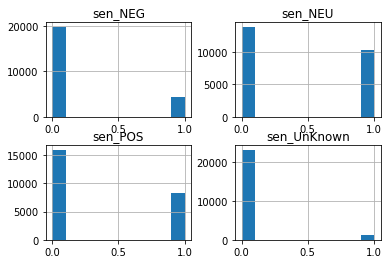

<Figure size 720x720 with 0 Axes>

In [222]:

pdnote1.hist()
# plt.figure(figsize=(10,10))
plt.show()

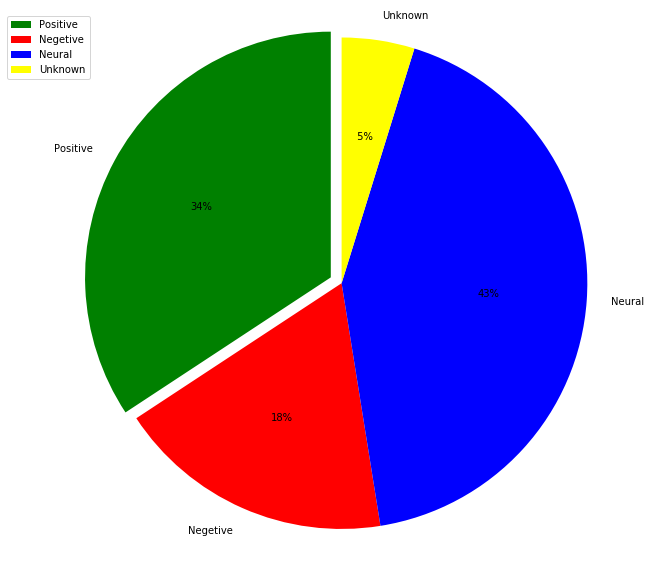

In [219]:
   
    plt.figure(figsize=(10,10))
    labels = [u'Positive', u'Negetive', u'Neural', u'Unknown']
    sizes = [8295, 4423, 10335, 1159]
    colors = ['green', 'red', 'blue', 'yellow']

    explode = (0.05, 0, 0, 0)

    patches, l_text, p_text = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                                       labeldistance=1.1, autopct='%2.0f%%', shadow=False,
                                       startangle=90, pctdistance=0.6)

   
    for t in l_text:
        t.set_size = 30
    for t in p_text:
        t.set_size = 20

    plt.axis('equal')
    plt.legend(loc='upper left', bbox_to_anchor=(-0.1, 1))
    
    plt.grid()
    plt.show()


In [ ]:
# Word

### Wordcloud of neg comments

In [138]:
negdf = pdnote.query(' sen_NEG == 1')

In [139]:
negdf.head()

,note,sentiment,sen_NEG,sen_NEU,sen_POS,sen_UnKnown
0,Send the correct products that I ordered. It took me 4 months to get a vial of beard oil I order...,NEG,1,0,0,0
1,Nothing personal :),NEG,1,0,0,0
6,I’ve already tried to tell you several times that not having an option to expedite a shipment i...,NEG,1,0,0,0
8,nothing.. ill renew the sub for the quarterly one later,NEG,1,0,0,0
9,Your site isn't very user friendly. I got charged for a subscription and I have no idea if I'm ...,NEG,1,0,0,0


In [140]:
negdf.shape

(4423, 6)

In [143]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# WordCloud is a technique to show which words are the most frequent among the given text. 

In [145]:
# ?WordCloud

In [147]:
negtext = " ".join(review for review in negdf.note)
print ("There are {} words in the combination of all negative review.".format(len(negtext)))

There are 285707 words in the combination of all negative review.


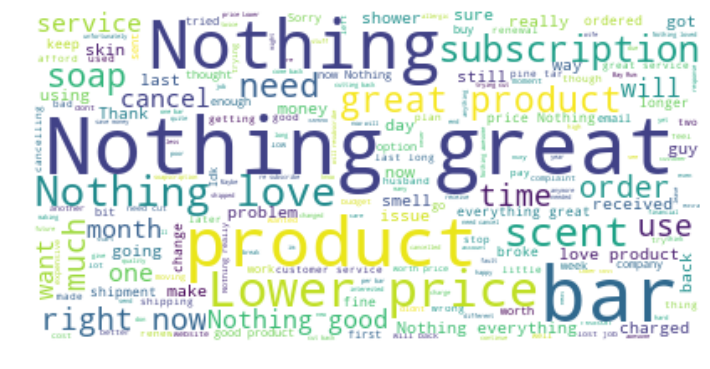

In [156]:
stopwords = set(STOPWORDS)
stopwords.update(["soap", "men", "man"])

# Generate a word cloud image
wordcloud1 = WordCloud(stopwords=stopwords, background_color="white").generate(negtext)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,9))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

### Wordcloud of pos comments

In [150]:
postext = " ".join(review for review in pdnote.query(' sen_POS == 1').note)
print ("There are {} words in the combination of all positive review.".format(len(postext)))

There are 718810 words in the combination of all positive review.


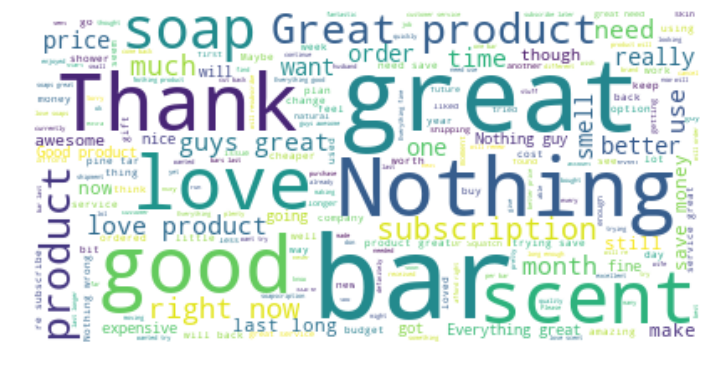

In [155]:
stopwords = set(STOPWORDS)
stopwords.update(["soap", "men", "man"])

# Generate a word cloud image
wordcloud2 = WordCloud(stopwords=stopwords, background_color="white").generate(postext)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,9))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

### Wordcloud of neu comments

There are 298985 words in the combination of all neu review.


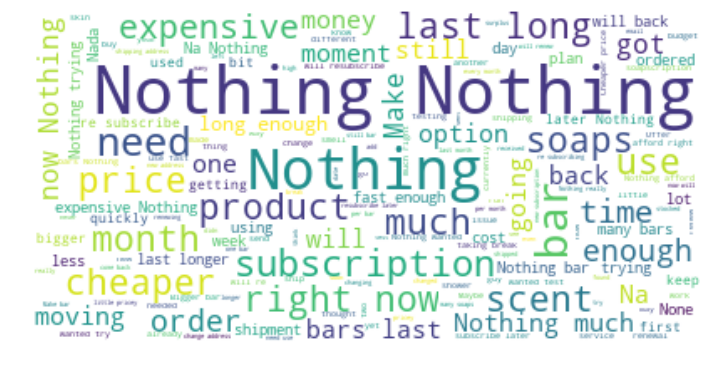

In [217]:
neutext = " ".join(review for review in pdnote.query(' sen_NEU == 1').note)
print ("There are {} words in the combination of all neu review.".format(len(neutext)))

stopwords = set(STOPWORDS)
stopwords.update(["soap", "men", "man"])

# Generate a word cloud image
wordcloud3 = WordCloud(stopwords=stopwords, background_color="white").generate(neutext)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,9))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

## Cluster reviews with KMeans

In [163]:
vectors_train.shape

(24212, 2000)

In [164]:
len(wordspitts)

2000

In [165]:
from time import time
begin = time()

from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(vectors_train)

end = time()
print(kmeans)
print((end - begin)/60)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
0.6529785354932149


In [166]:
assigned_cluster = kmeans.predict(vectors_train)

print("cluster centers:")
print(kmeans.cluster_centers_)

In [169]:

top_centroids = kmeans.cluster_centers_.argsort()[:, -1:-11:-1]
print("top 10 features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(wordspitts[i] for i in centroid)))

top 10 features for each cluster:
0: throughout, various, subscribers, deals, current, maybe, subscription, felt, fellow, fell
1: great, nothing, product, soap, guys, everything, service, right, need, back
2: expensive, soap, little, less, great, product, bit, good, last, long
3: soap, nothing, good, product, need, bars, love, much, back, like
4: nothing, soap, product, good, everything, service, bar, use, scents, trying
5: smells, great, like, soap, last, long, pine, bar, smell, good
6: fine, everything, nothing, service, soap, product, need, guys, back, wanted
7: price, lower, prices, high, bars, soap, better, little, cost, last


#### Print out the rating and review of three random samples of the reviews assigned to each cluster to get a sense of the cluster.

In [202]:
import numpy as np
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, vectors_train.shape[0])[assigned_cluster==i]
    sample_reviews1 = np.random.choice(cluster, 1, replace=False)
    sample_reviews2 = np.random.choice(cluster, 1, replace=False)
    sample_reviews3 = np.random.choice(cluster, 1, replace=False)
    print("cluster %d:" % i)
#     print(sample_reviews)
    for review1 in sample_reviews1:
        print("    %s" % data1.iloc[review1]['note'])
    for review2 in sample_reviews2:
        print("    %s" % data1.iloc[review2]['note'])
    for review3 in sample_reviews3:
        print("    %s" % data1.iloc[review3]['note'])

cluster 0:
    Maybe some various deals throughout the subscription for current subscribers
    Maybe some various deals throughout the subscription for current subscribers
    Maybe some various deals throughout the subscription for current subscribers
cluster 1:
    Your product is great
    Great product, no particular reason. 
    Nothing, great product may return when more scent come
Out 
cluster 2:
    Adjust the price. Little expensive.
    It is just to expensive for me.
    $13 for two bars of soap is expensive.
cluster 3:
    Trying to change my subscription so starting from scratch
    I dunno
    Nothing. Still have soap left
cluster 4:
    Nothing
    Nothing
    Nothing 
cluster 5:
    Better smelling soap. Smells like the stuff hotels leave you
    I just like the way duke cannon pine soap smells. 
    Smells are good, just not my scents of choice.
cluster 6:
    Everything is fine with the service. Is just a hardship right now
    The service is fine.
    All is fine. U

## Similar review search engine

In [208]:
def get_top_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the highest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["cat", "pig"]
    '''
    return [labels[i] for i in np.argsort(lst)[::-1][:n]]  # np.argsort by default sorts values in ascending order

def get_bottom_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the lowest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["mouse", "rabbit"]
    '''
    return [labels[i] for i in np.argsort(lst)[:n]]

In [209]:
from sklearn.metrics.pairwise import cosine_similarity

# Draw an arbitrary review from test (unseen in training) documents
random_number = 220
search_query = [notes[random_number]]
print(search_query)

In [212]:
# Transform the drawn resview(s) to vector(s)
vector_search_query = tfidf_vectorizer.transform(search_query).toarray()

# Calculate the similarity score(s) between vector(s) and training vectors
similarity_scores = cosine_similarity(vector_search_query, vectors_train)

# Let's find top 10 similar reviews
n = 10
top_similar_reviews = get_top_values(similarity_scores[0], n, notes)

print('Our search query:')
print(search_query[0]) 

print('query')
print(search_query)  

print('\n\nMost %s similar reviews:' % n)
for i, review in enumerate(top_similar_reviews):
    print('#%s:' % i)
    print(review)